# Trasformar los datos

In [1]:
import xml.etree.ElementTree as ET

tree = ET.parse(r"C:\Users\cr-19\Desktop\Strava\Bicicleta_el_ctrica_a_la_hora_del_almuerzo.gpx")
root = tree.getroot()

ns = {'gpx': 'http://www.topografix.com/GPX/1/1'}

track_name = root.find('gpx:trk/gpx:name', ns).text
track_type = root.find('gpx:trk/gpx:type', ns).text

track_points = []
for trkpt in root.findall('gpx:trk/gpx:trkseg/gpx:trkpt', ns):
    lat = trkpt.attrib['lat']
    lon = trkpt.attrib['lon']
    ele = trkpt.find('gpx:ele', ns).text
    time = trkpt.find('gpx:time', ns).text
    track_points.append({'lat': lat, 'lon': lon, 'ele': ele, 'time': time})

print("Nombre del track:", track_name)
print("Tipo de track:", track_type)
print("Puntos del track:")
for point in track_points:
    print("Latitud:", point['lat'], "Longitud:", point['lon'], "Elevación:", point['ele'], "Tiempo:", point['time'])



Nombre del track: Bicicleta eléctrica a la hora del almuerzo
Tipo de track: ebikeride
Puntos del track:
Latitud: 6.2653780 Longitud: -75.5751000 Elevación: 1465.7 Tiempo: 2024-04-29T17:32:29Z
Latitud: 6.2653940 Longitud: -75.5751090 Elevación: 1465.7 Tiempo: 2024-04-29T17:32:30Z
Latitud: 6.2654000 Longitud: -75.5751150 Elevación: 1465.7 Tiempo: 2024-04-29T17:32:31Z
Latitud: 6.2654050 Longitud: -75.5751210 Elevación: 1465.7 Tiempo: 2024-04-29T17:32:32Z
Latitud: 6.2654100 Longitud: -75.5751280 Elevación: 1465.7 Tiempo: 2024-04-29T17:32:33Z
Latitud: 6.2654150 Longitud: -75.5751340 Elevación: 1465.7 Tiempo: 2024-04-29T17:32:34Z
Latitud: 6.2654210 Longitud: -75.5751400 Elevación: 1465.7 Tiempo: 2024-04-29T17:32:35Z
Latitud: 6.2654260 Longitud: -75.5751470 Elevación: 1465.7 Tiempo: 2024-04-29T17:32:36Z
Latitud: 6.2654310 Longitud: -75.5751530 Elevación: 1465.7 Tiempo: 2024-04-29T17:32:37Z
Latitud: 6.2654360 Longitud: -75.5751590 Elevación: 1465.7 Tiempo: 2024-04-29T17:32:38Z
Latitud: 6.26544

In [2]:
import pandas as pd

# Datos de ejemplo
data = [
    {"latitud": "6.2653780", "longitud": "-75.5751000", "elevacion": "1465.7", "tiempo": "2024-04-29T17:32:29Z"},
    {"latitud": "6.2653940", "longitud": "-75.5751090", "elevacion": "1465.7", "tiempo": "2024-04-29T17:32:30Z"},
    {"latitud": "6.2654000", "longitud": "-75.5751150", "elevacion": "1465.7", "tiempo": "2024-04-29T17:32:31Z"},
    # Resto de los datos aquí...
]

# Crear DataFrame
df = pd.DataFrame(data)

# Imprimir DataFrame
print(df)

     latitud     longitud elevacion                tiempo
0  6.2653780  -75.5751000    1465.7  2024-04-29T17:32:29Z
1  6.2653940  -75.5751090    1465.7  2024-04-29T17:32:30Z
2  6.2654000  -75.5751150    1465.7  2024-04-29T17:32:31Z


In [3]:
import pandas as pd

df = pd.DataFrame(data)

In [4]:
data = []
for point in track_points:
    data.append({
        "latitud": point['lat'],
        "longitud": point['lon'],
        "elevacion": point['ele'],
        "tiempo": point['time']
    })

# Crear DataFrame
df = pd.DataFrame(data)

# Imprimir DataFrame
print(df)


       latitud     longitud elevacion                tiempo
0    6.2653780  -75.5751000    1465.7  2024-04-29T17:32:29Z
1    6.2653940  -75.5751090    1465.7  2024-04-29T17:32:30Z
2    6.2654000  -75.5751150    1465.7  2024-04-29T17:32:31Z
3    6.2654050  -75.5751210    1465.7  2024-04-29T17:32:32Z
4    6.2654100  -75.5751280    1465.7  2024-04-29T17:32:33Z
..         ...          ...       ...                   ...
800  6.2149320  -75.5577960    1687.1  2024-04-29T17:46:54Z
801  6.2150330  -75.5578490    1687.4  2024-04-29T17:46:55Z
802  6.2151370  -75.5578990    1687.8  2024-04-29T17:46:56Z
803  6.2152380  -75.5579280    1688.3  2024-04-29T17:46:57Z
804  6.2153210  -75.5579320    1688.7  2024-04-29T17:46:58Z

[805 rows x 4 columns]


In [5]:
df.shape

(805, 4)

In [6]:
df['latitud'] = df['latitud'].astype(float)
df['longitud'] = df['longitud'].astype(float)
df['elevacion'] = df['elevacion'].astype(float)
df['tiempo'] = pd.to_datetime(df['tiempo'], format='%Y-%m-%dT%H:%M:%SZ')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   latitud    805 non-null    float64       
 1   longitud   805 non-null    float64       
 2   elevacion  805 non-null    float64       
 3   tiempo     805 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3)
memory usage: 25.3 KB


In [8]:
df.describe()

,latitud,longitud,elevacion
count,805.000000,805.000000,805.000000
mean,6.238457,-75.570203,1520.496398
std,0.015155,0.005249,65.829251
min,6.214456,-75.576056,1463.000000
25%,6.225784,-75.575132,1473.900000
50%,6.238323,-75.572393,1482.500000
75%,6.251341,-75.565950,1564.400000
max,6.265447,-75.557327,1688.700000


In [9]:
df.set_index('tiempo', inplace=True)
serie_tiempo = df['elevacion']

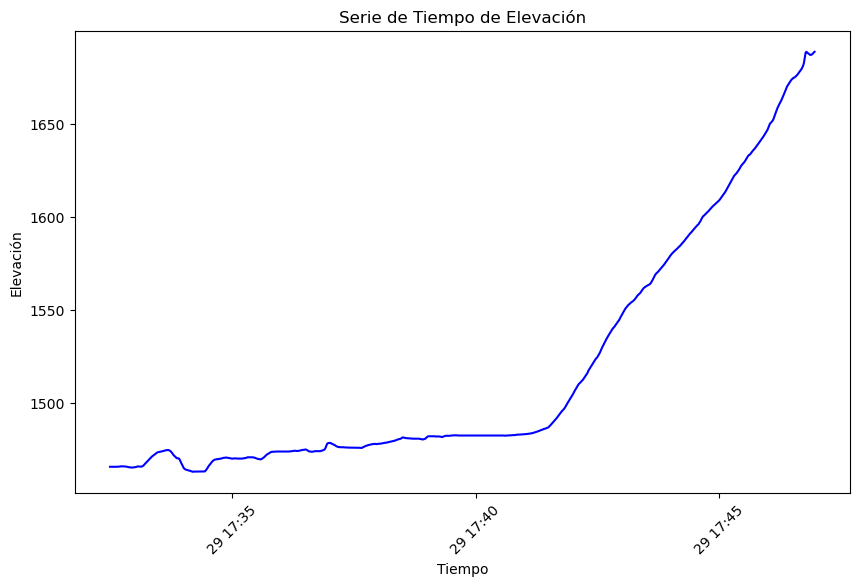

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(serie_tiempo.index, serie_tiempo.values, color='blue')
plt.title('Serie de Tiempo de Elevación')
plt.xlabel('Tiempo')
plt.ylabel('Elevación')
plt.xticks(rotation=45)
plt.show()


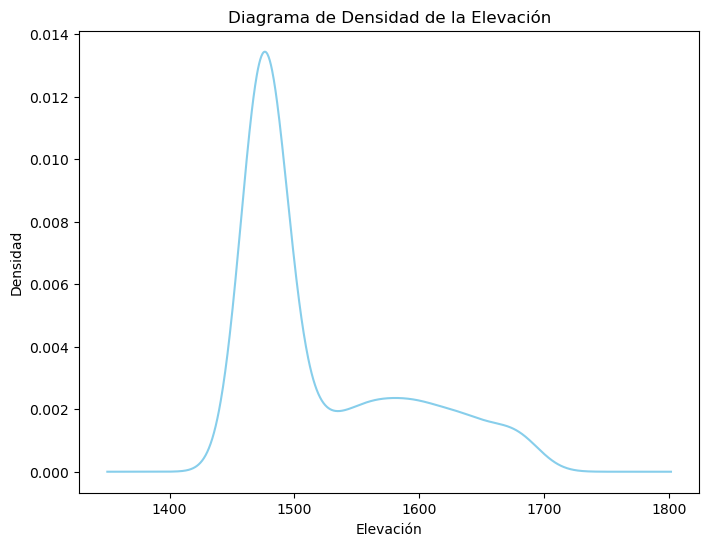

In [11]:
plt.figure(figsize=(8, 6))
df['elevacion'].plot.density(color='skyblue')
plt.title('Diagrama de Densidad de la Elevación')
plt.xlabel('Elevación')
plt.ylabel('Densidad')
plt.show()

In [12]:
df.reset_index(inplace=True)
df.insert(0, 'conteo', range(1, len(df) + 1))
df.set_index('tiempo', inplace=True)
print(df)


                     conteo   latitud   longitud  elevacion
tiempo                                                     
2024-04-29 17:32:29       1  6.265378 -75.575100     1465.7
2024-04-29 17:32:30       2  6.265394 -75.575109     1465.7
2024-04-29 17:32:31       3  6.265400 -75.575115     1465.7
2024-04-29 17:32:32       4  6.265405 -75.575121     1465.7
2024-04-29 17:32:33       5  6.265410 -75.575128     1465.7
...                     ...       ...        ...        ...
2024-04-29 17:46:54     801  6.214932 -75.557796     1687.1
2024-04-29 17:46:55     802  6.215033 -75.557849     1687.4
2024-04-29 17:46:56     803  6.215137 -75.557899     1687.8
2024-04-29 17:46:57     804  6.215238 -75.557928     1688.3
2024-04-29 17:46:58     805  6.215321 -75.557932     1688.7

[805 rows x 4 columns]


In [13]:
df.head(805)

,conteo,latitud,longitud,elevacion
tiempo,,,,
2024-04-29 17:32:29,1,6.265378,-75.575100,1465.7
2024-04-29 17:32:30,2,6.265394,-75.575109,1465.7
2024-04-29 17:32:31,3,6.265400,-75.575115,1465.7
2024-04-29 17:32:32,4,6.265405,-75.575121,1465.7
2024-04-29 17:32:33,5,6.265410,-75.575128,1465.7
...,...,...,...,...
2024-04-29 17:46:54,801,6.214932,-75.557796,1687.1
2024-04-29 17:46:55,802,6.215033,-75.557849,1687.4
2024-04-29 17:46:56,803,6.215137,-75.557899,1687.8


In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Leostark95/Strava/main/df_velocidad.txt'
# Intenta leer el archivo especificando la codificación
df_velocidad = pd.read_csv(url, encoding='latin1')

df_velocidad.rename(columns={'Leg Length': 'Leg_Length', 'Leg Speed': 'Leg_Speed'}, inplace=True)
df = pd.concat([df, df_velocidad[['Leg_Length', 'Leg_Speed']]], axis=1)
